In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import sys
sys.path.insert(0, '/home/tomek/ib_tools/')
from indicators import get_signals
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var

/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pyfolio/pos.py:27: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  'Module "zipline.assets" not found; mutltipliers will not be applied' +


In [2]:
data = pd.read_pickle('freeze/live/freeze_df_NQM0.pickle')

In [25]:
data.iloc[1100:].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-05-22 20:03:30,True,9384.75,9406.25,9384.25,9405.75,9405.75,3973,9396.313530,9371.259847,18.488345,1.0,1.0,1.0,9405.75,NaN,NaN
2020-05-22 20:12:00,True,9405.50,9413.25,9404.75,9410.75,9410.75,3662,9401.125687,9371.912577,18.377976,1.0,1.0,1.0,9410.75,NaN,NaN
2020-05-22 20:28:00,True,9410.75,9412.50,9402.25,9406.00,9406.00,3597,9402.750458,9372.476005,18.288163,0.0,1.0,0.0,NaN,NaN,9406.00
2020-05-22 20:41:00,True,9405.75,9417.75,9402.75,9414.25,9414.25,3602,9406.583638,9373.166485,18.251830,1.0,1.0,1.0,9414.25,NaN,NaN
2020-05-22 20:48:30,True,9414.25,9415.25,9399.25,9401.75,9401.75,3629,9404.972426,9373.638940,18.226948,0.0,1.0,0.0,NaN,NaN,9401.75
2020-05-22 21:00:00,True,9401.75,9405.50,9393.75,9397.75,9397.75,3912,9402.564950,9374.037469,18.155379,0.0,1.0,0.0,NaN,NaN,9397.75
2020-05-22 21:10:00,True,9397.75,9409.50,9397.75,9404.75,9404.75,3823,9403.293300,9374.545115,18.084601,0.0,1.0,0.0,NaN,NaN,9404.75
2020-05-22 21:21:00,True,9404.75,9407.25,9388.75,9393.50,9393.50,3790,9400.028867,9374.858418,18.089191,0.0,1.0,0.0,NaN,NaN,9393.50
2020-05-22 21:26:30,True,9393.50,9396.75,9378.50,9382.25,9382.25,3690,9394.102578,9374.980593,18.090968,0.0,1.0,0.0,NaN,NaN,9382.25


In [4]:
data.loc['2020-05-22 15:00:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-05-22 15:02:30,True,9351.75,9358.00,9344.75,9357.75,9357.75,3886,9352.820133,9374.523987,19.635719,0.0,-1.0,0.0
2020-05-22 15:14:30,True,9358.00,9371.50,9352.50,9358.25,9358.25,3606,9354.630089,9374.254995,19.628694,0.0,-1.0,0.0
2020-05-22 15:29:00,True,9358.25,9362.00,9351.00,9359.00,9359.00,3599,9356.086726,9374.002846,19.533349,0.0,-1.0,0.0
2020-05-22 15:31:00,True,9359.00,9368.50,9351.50,9356.00,9356.00,4211,9356.057817,9373.705279,19.505356,0.0,-1.0,0.0
2020-05-22 15:33:00,True,9355.50,9366.75,9341.00,9343.00,9343.00,3778,9351.705211,9373.197753,19.574358,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 14:22:00,True,9505.00,9514.25,9500.00,9509.50,9509.50,3615,9498.613275,9399.323384,19.268165,1.0,1.0,1.0
2020-05-25 15:11:30,True,9509.75,9522.00,9502.25,9516.75,9516.75,3598,9504.658850,9401.264320,19.273489,1.0,1.0,1.0
2020-05-25 15:47:00,True,9517.00,9526.00,9513.75,9518.25,9518.25,3617,9509.189233,9403.197967,19.195881,1.0,1.0,1.0


In [5]:
data[data['backfill'] != True]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-05-25 16:27:00,False,9518.75,9527.75,9517.25,9521.75,9521.75,3613,9513.376155,9405.157505,19.099794,1.0,1.0,1.0
2020-05-25 17:21:00,False,9522.25,9532.00,9521.50,9528.25,9528.25,3606,9518.334104,9407.192092,19.004768,1.0,1.0,1.0


In [6]:
data.tail(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-05-22 17:49:00,True,9365.00,9369.00,9360.25,9361.50,9361.50,3656,9357.506005,9367.432415,19.147581,0.0,-1.0,0.0
2020-05-22 18:00:30,True,9361.00,9369.50,9357.75,9368.00,9368.00,3597,9361.004003,9367.441796,19.065839,0.0,-1.0,0.0
2020-05-22 18:09:30,True,9368.00,9371.25,9358.25,9362.00,9362.00,3669,9361.336002,9367.351849,18.998813,0.0,-1.0,0.0
2020-05-22 18:20:30,True,9361.75,9368.50,9354.00,9367.75,9367.75,3638,9363.474001,9367.358430,18.949102,0.0,-1.0,0.0
2020-05-22 18:35:00,True,9367.75,9379.50,9365.25,9378.25,9378.25,3799,9368.399334,9367.538456,18.897178,0.0,1.0,0.0
2020-05-22 18:44:30,True,9378.50,9390.75,9377.25,9390.25,9390.25,3662,9375.682890,9367.913854,18.837541,0.0,1.0,0.0
2020-05-22 18:57:00,True,9390.00,9394.00,9380.25,9386.50,9386.50,3854,9379.288593,9368.221063,18.781324,0.0,1.0,0.0
2020-05-22 19:02:00,True,9386.00,9394.75,9377.50,9393.25,9393.25,3930,9383.942395,9368.634764,18.764404,1.0,1.0,1.0
2020-05-22 19:09:30,True,9393.00,9399.75,9389.00,9389.50,9389.50,3657,9385.794930,9368.979644,18.675846,0.0,1.0,0.0


/home/tomek/.virtualenvs/ib/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


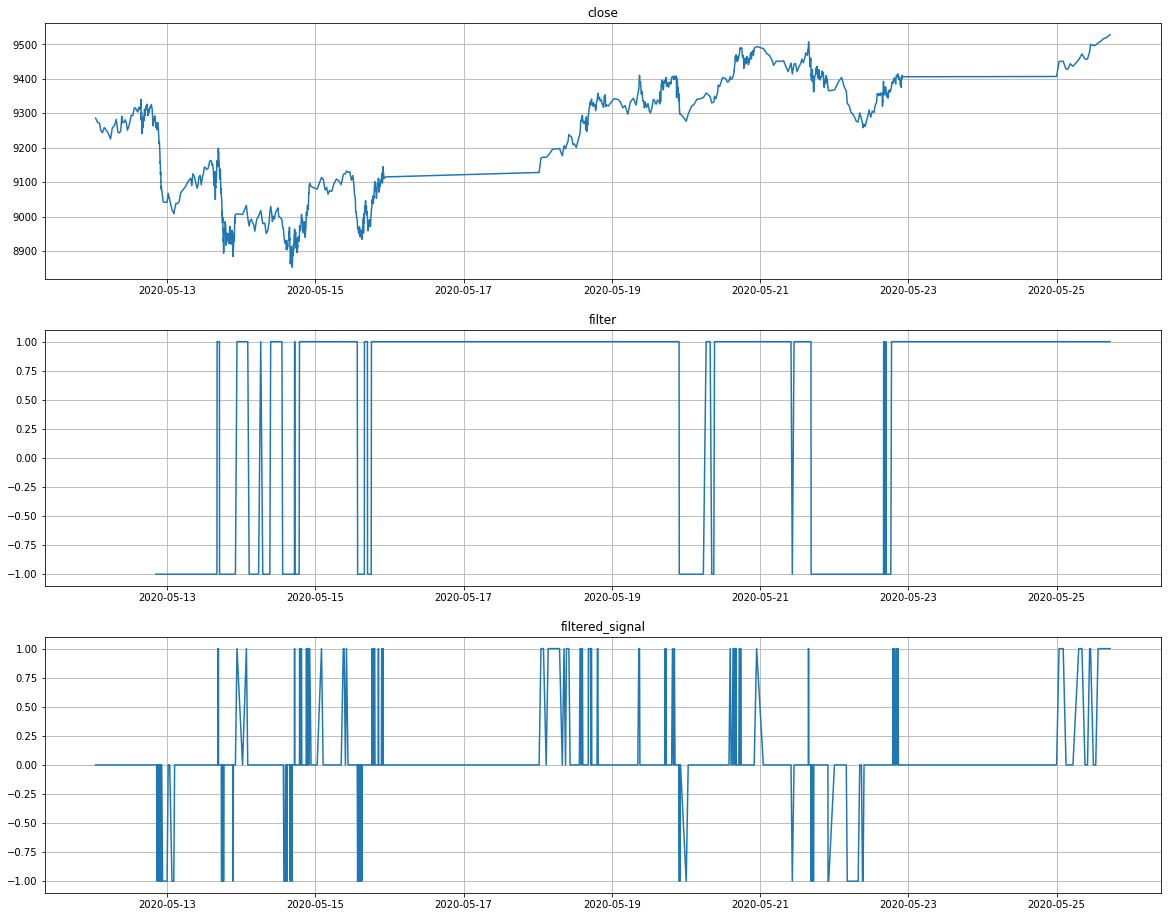

In [7]:
plot(data[['close', 'filter', 'filtered_signal']]);

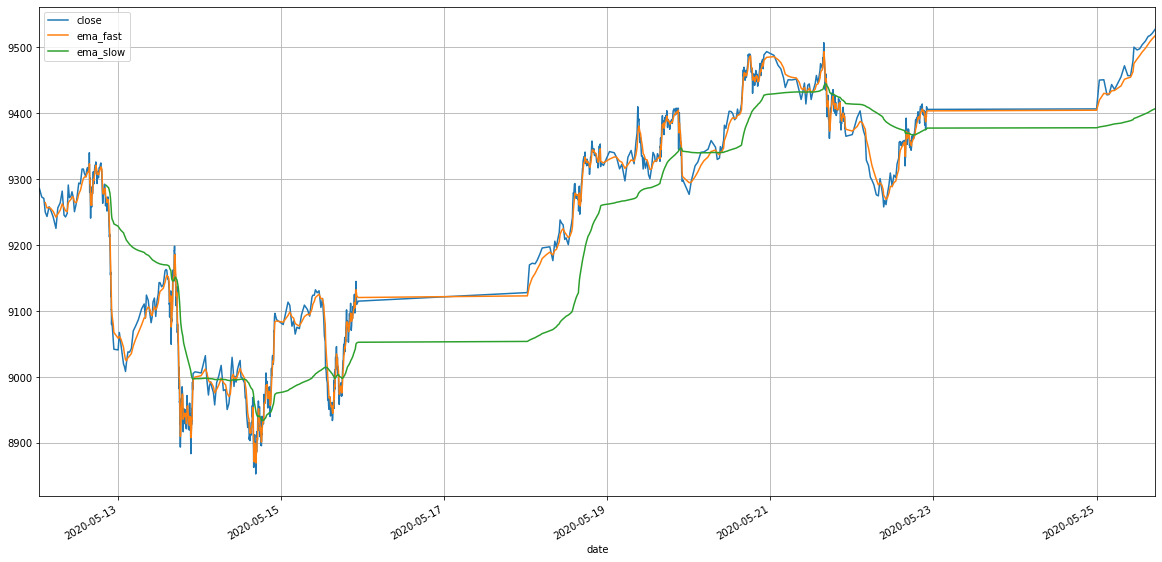

In [8]:
data[['close', 'ema_fast', 'ema_slow']].plot(figsize=(20,10), grid=True);

In [9]:
data.loc['20200228 15:00':]

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-05-12 00:50:00,True,9282.00,9311.25,9280.75,9285.75,9285.75,3610,NaN,NaN,30.500000,0.0,NaN,0.0
2020-05-12 01:31:00,True,9285.75,9302.00,9267.75,9273.00,9273.00,3647,NaN,NaN,32.385417,0.0,NaN,0.0
2020-05-12 02:07:30,True,9272.50,9284.75,9260.25,9271.00,9271.00,3619,NaN,NaN,29.727685,0.0,NaN,0.0
2020-05-12 02:32:30,True,9271.50,9271.50,9246.00,9250.00,9250.00,3634,9264.461538,NaN,28.653084,0.0,NaN,0.0
2020-05-12 03:03:30,True,9250.00,9258.75,9237.00,9243.50,9243.50,3692,9256.414692,NaN,27.241617,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-25 14:22:00,True,9505.00,9514.25,9500.00,9509.50,9509.50,3615,9498.613275,9399.323384,19.268165,1.0,1.0,1.0
2020-05-25 15:11:30,True,9509.75,9522.00,9502.25,9516.75,9516.75,3598,9504.658850,9401.264320,19.273489,1.0,1.0,1.0
2020-05-25 15:47:00,True,9517.00,9526.00,9513.75,9518.25,9518.25,3617,9509.189233,9403.197967,19.195881,1.0,1.0,1.0


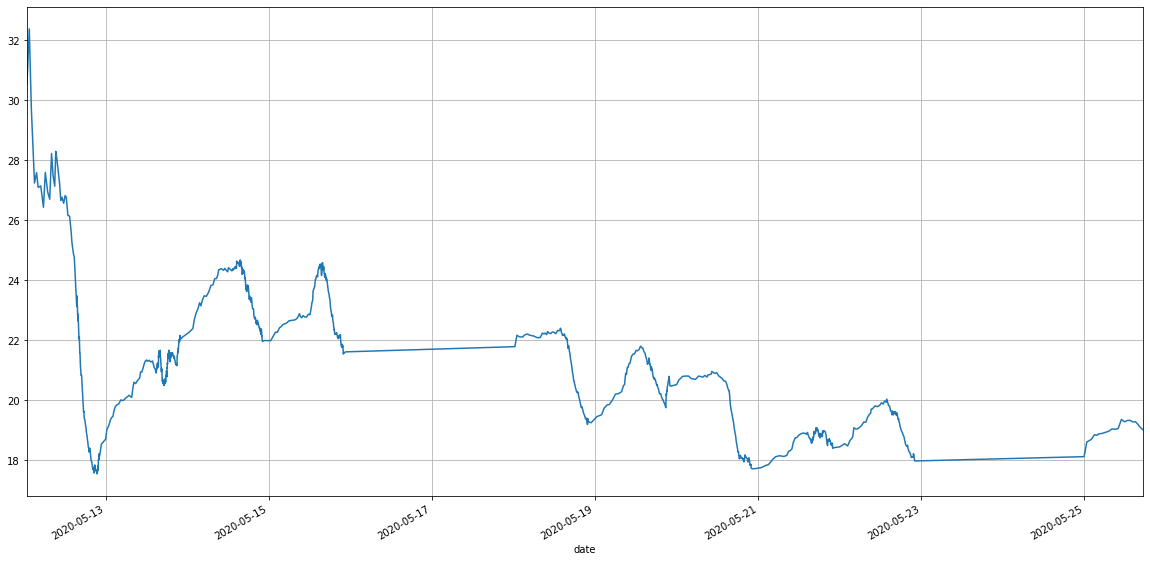

In [10]:
data['atr'].plot(figsize=(20, 10), grid=True);

In [11]:
data.loc['20180206':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal
date,,,,,,,,,,,,,
2020-05-12 00:50:00,True,9282.00,9311.25,9280.75,9285.75,9285.75,3610,NaN,NaN,30.500000,0.0,NaN,0.0
2020-05-12 01:31:00,True,9285.75,9302.00,9267.75,9273.00,9273.00,3647,NaN,NaN,32.385417,0.0,NaN,0.0
2020-05-12 02:07:30,True,9272.50,9284.75,9260.25,9271.00,9271.00,3619,NaN,NaN,29.727685,0.0,NaN,0.0
2020-05-12 02:32:30,True,9271.50,9271.50,9246.00,9250.00,9250.00,3634,9264.461538,NaN,28.653084,0.0,NaN,0.0
2020-05-12 03:03:30,True,9250.00,9258.75,9237.00,9243.50,9243.50,3692,9256.414692,NaN,27.241617,0.0,NaN,0.0
2020-05-12 03:40:00,True,9243.50,9271.75,9242.50,9258.25,9258.25,3662,9257.085338,NaN,27.585714,0.0,NaN,0.0
2020-05-12 04:08:30,True,9258.25,9258.25,9234.00,9253.25,9253.25,3617,9255.727416,NaN,27.093153,0.0,NaN,0.0
2020-05-12 04:53:30,True,9253.75,9254.75,9227.25,9242.50,9242.50,3617,9251.139255,NaN,27.146008,0.0,NaN,0.0
2020-05-12 05:41:30,True,9242.50,9245.00,9224.00,9225.50,9225.50,3631,9242.364587,NaN,26.432377,0.0,NaN,0.0


In [12]:
data['long'] = data['filtered_signal'] > 0
data['short'] = data['filtered_signal'] < 0
data['out'] = data['filtered_signal'] == 0
data['long'] = data['long'] * data['price']
data['short'] = data['short'] * data['price']
data['out'] = data['out'] * data['price']
data[['long', 'short', 'out']] = data[['long', 'short', 'out']].replace({0:np.nan})
data.tail()

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-05-25 14:22:00,True,9505.00,9514.25,9500.00,9509.50,9509.50,3615,9498.613275,9399.323384,19.268165,1.0,1.0,1.0,9509.50,NaN,NaN
2020-05-25 15:11:30,True,9509.75,9522.00,9502.25,9516.75,9516.75,3598,9504.658850,9401.264320,19.273489,1.0,1.0,1.0,9516.75,NaN,NaN
2020-05-25 15:47:00,True,9517.00,9526.00,9513.75,9518.25,9518.25,3617,9509.189233,9403.197967,19.195881,1.0,1.0,1.0,9518.25,NaN,NaN
2020-05-25 16:27:00,False,9518.75,9527.75,9517.25,9521.75,9521.75,3613,9513.376155,9405.157505,19.099794,1.0,1.0,1.0,9521.75,NaN,NaN
2020-05-25 17:21:00,False,9522.25,9532.00,9521.50,9528.25,9528.25,3606,9518.334104,9407.192092,19.004768,1.0,1.0,1.0,9528.25,NaN,NaN


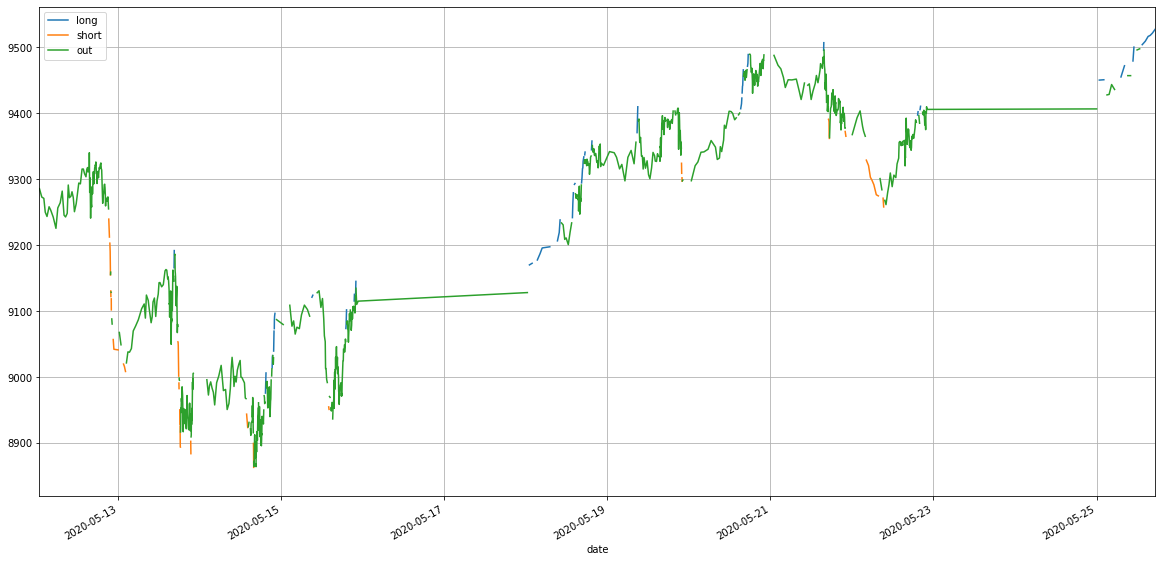

In [13]:
data[['long', 'short', 'out']].plot(figsize=(20, 10), grid=True);

In [14]:
periods = [10, 20, 40, 80, ]

In [15]:
min_max = pd.DataFrame({'close': data.price})

In [16]:
min_max

,close
date,
2020-05-12 00:50:00,9285.75
2020-05-12 01:31:00,9273.00
2020-05-12 02:07:30,9271.00
2020-05-12 02:32:30,9250.00
2020-05-12 03:03:30,9243.50
...,...
2020-05-25 14:22:00,9509.50
2020-05-25 15:11:30,9516.75
2020-05-25 15:47:00,9518.25


In [17]:
for p in periods:
    min_max[f'min_{p}'] = min_max.close.rolling(p).min()
    #min_max[f'max_{p}'] = min_max.close.rolling(p).max()

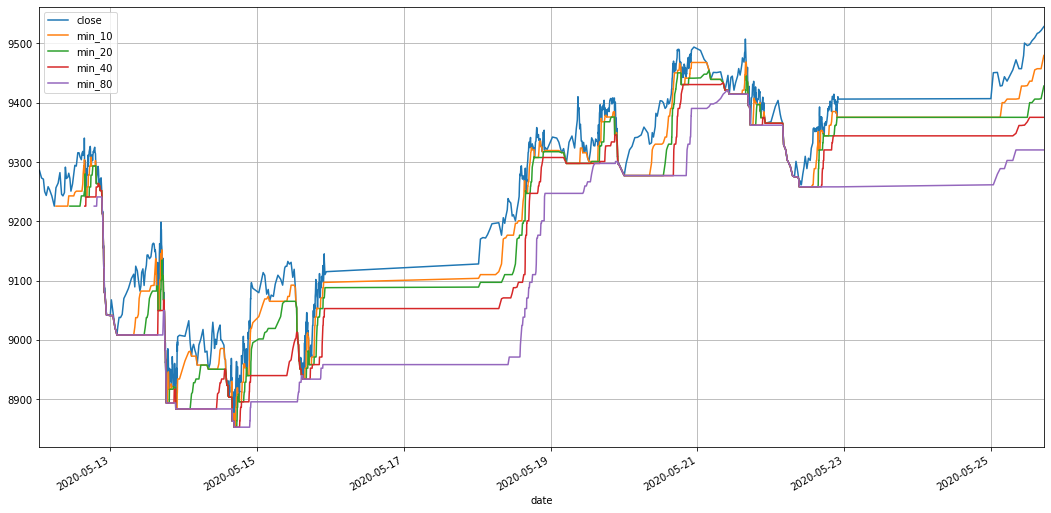

In [18]:
min_max.plot(figsize=(18, 9), grid=True);

In [19]:
data[data['signal'] != 0].loc['20190927':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-05-12 20:18:00,True,9277.00,9278.25,9257.50,9259.50,9259.50,3619,9275.273391,NaN,17.738588,-1.0,NaN,-0.0,NaN,NaN,9259.50
2020-05-12 20:42:30,True,9271.00,9281.25,9249.50,9251.75,9251.75,4361,9264.760793,9289.410020,17.796531,-1.0,-1.0,-1.0,NaN,9251.75,NaN
2020-05-12 21:14:30,True,9255.00,9255.25,9238.25,9239.50,9239.50,4128,9255.500948,9286.188200,17.619454,-1.0,-1.0,-1.0,NaN,9239.50,NaN
2020-05-12 21:18:30,True,9239.75,9249.00,9229.25,9230.00,9230.00,3793,9247.000632,9285.068040,17.653472,-1.0,-1.0,-1.0,NaN,9230.00,NaN
2020-05-12 21:22:30,True,9230.25,9233.25,9216.25,9217.50,9217.50,3866,9237.167088,9283.725587,17.643090,-1.0,-1.0,-1.0,NaN,9217.50,NaN
2020-05-12 21:26:00,True,9217.50,9223.75,9206.00,9212.25,9212.25,3986,9228.861392,9282.310224,17.644780,-1.0,-1.0,-1.0,NaN,9212.25,NaN
2020-05-12 21:33:30,True,9216.50,9221.25,9199.50,9203.00,9203.00,3864,9217.493952,9279.476479,17.598405,-1.0,-1.0,-1.0,NaN,9203.00,NaN
2020-05-12 21:36:00,True,9202.25,9212.50,9191.25,9195.75,9195.75,3751,9210.245968,9277.834383,17.655341,-1.0,-1.0,-1.0,NaN,9195.75,NaN
2020-05-12 21:39:00,True,9195.50,9200.00,9181.75,9190.75,9190.75,4346,9203.747312,9276.131680,17.664571,-1.0,-1.0,-1.0,NaN,9190.75,NaN


In [20]:
data[data['signal'] != 0].tail(60)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-05-20 15:15:30,True,9400.50,9409.00,9399.50,9407.00,9407.00,3669,9401.293037,9350.904551,20.355730,1.0,1.0,1.0,9407.00,NaN,NaN
2020-05-20 15:30:00,True,9406.75,9414.50,9397.25,9414.50,9414.50,4997,9405.695358,9351.955716,20.321410,1.0,1.0,1.0,9414.50,NaN,NaN
2020-05-20 15:31:30,True,9414.75,9427.75,9411.00,9417.00,9417.00,4065,9409.463572,9353.030829,20.281943,1.0,1.0,1.0,9417.00,NaN,NaN
2020-05-20 15:33:30,True,9417.50,9430.50,9410.00,9419.50,9419.50,4173,9412.809048,9354.129494,20.284353,1.0,1.0,1.0,9419.50,NaN,NaN
2020-05-20 15:36:00,True,9419.50,9429.25,9411.50,9423.25,9423.25,3658,9416.289365,9355.271983,20.256347,1.0,1.0,1.0,9423.25,NaN,NaN
2020-05-20 15:41:00,True,9423.25,9439.00,9423.00,9431.00,9431.00,4620,9422.628607,9357.620591,20.151867,1.0,1.0,1.0,9431.00,NaN,NaN
2020-05-20 15:44:00,True,9431.50,9442.00,9429.25,9435.75,9435.75,4024,9427.002405,9358.911987,20.070072,1.0,1.0,1.0,9435.75,NaN,NaN
2020-05-20 15:47:00,True,9435.75,9447.00,9432.00,9441.00,9441.00,3739,9431.668270,9360.268815,20.014044,1.0,1.0,1.0,9441.00,NaN,NaN
2020-05-20 15:51:00,True,9441.25,9449.00,9438.00,9442.50,9442.50,3619,9435.278846,9361.628009,19.914433,1.0,1.0,1.0,9442.50,NaN,NaN


In [21]:
averages = pd.DataFrame({'price': data.price,
                       'ema_fast': data.price.ewm(span=100).mean(),
                       'ema_slow': data.price.ewm(span=160).mean()})

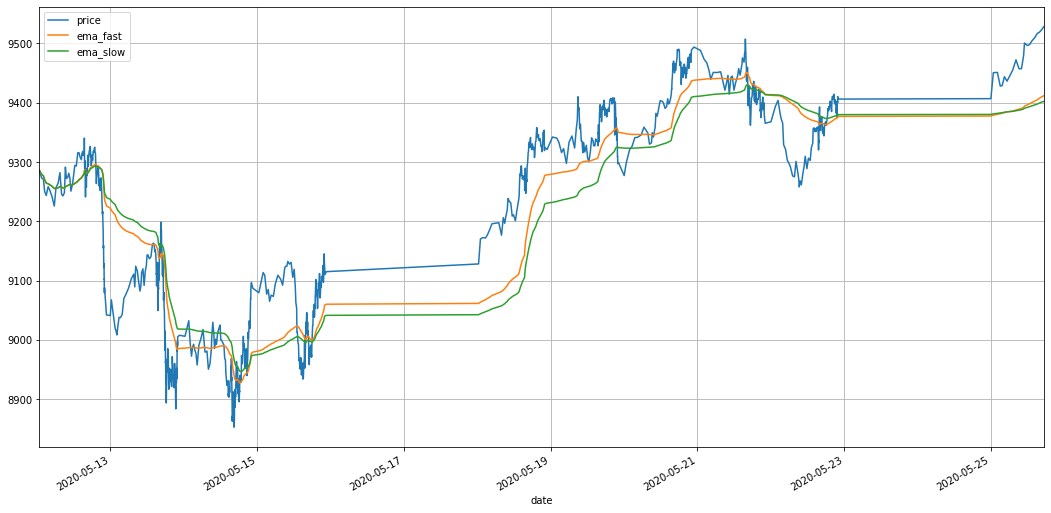

In [22]:
averages.plot(figsize=(18,9), grid=True);

In [23]:
data.loc['20180221':].head(50)

,backfill,open,high,low,close,price,volume,ema_fast,ema_slow,atr,signal,filter,filtered_signal,long,short,out
date,,,,,,,,,,,,,,,,
2020-05-12 00:50:00,True,9282.00,9311.25,9280.75,9285.75,9285.75,3610,NaN,NaN,30.500000,0.0,NaN,0.0,NaN,NaN,9285.75
2020-05-12 01:31:00,True,9285.75,9302.00,9267.75,9273.00,9273.00,3647,NaN,NaN,32.385417,0.0,NaN,0.0,NaN,NaN,9273.00
2020-05-12 02:07:30,True,9272.50,9284.75,9260.25,9271.00,9271.00,3619,NaN,NaN,29.727685,0.0,NaN,0.0,NaN,NaN,9271.00
2020-05-12 02:32:30,True,9271.50,9271.50,9246.00,9250.00,9250.00,3634,9264.461538,NaN,28.653084,0.0,NaN,0.0,NaN,NaN,9250.00
2020-05-12 03:03:30,True,9250.00,9258.75,9237.00,9243.50,9243.50,3692,9256.414692,NaN,27.241617,0.0,NaN,0.0,NaN,NaN,9243.50
2020-05-12 03:40:00,True,9243.50,9271.75,9242.50,9258.25,9258.25,3662,9257.085338,NaN,27.585714,0.0,NaN,0.0,NaN,NaN,9258.25
2020-05-12 04:08:30,True,9258.25,9258.25,9234.00,9253.25,9253.25,3617,9255.727416,NaN,27.093153,0.0,NaN,0.0,NaN,NaN,9253.25
2020-05-12 04:53:30,True,9253.75,9254.75,9227.25,9242.50,9242.50,3617,9251.139255,NaN,27.146008,0.0,NaN,0.0,NaN,NaN,9242.50
2020-05-12 05:41:30,True,9242.50,9245.00,9224.00,9225.50,9225.50,3631,9242.364587,NaN,26.432377,0.0,NaN,0.0,NaN,NaN,9225.50
